<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch03_05_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EC%82%B0%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.05. 기초통계 - 산포통계량
---
* 날짜:
* 이름:

## 학습내용
    * 산포 통계량
      - 분산
      - 표준편차
      - 변동계수
      - 스케일링
      - 범위와 사분위 범위

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  산포 통계
---

* 산포란 데이터가 얼마나 퍼져있는지를 의미

* 따라서 산포 통계량이란 데이터의 산포를 나타내는 통계량이라 할 수 있다.

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```


* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a1`로 바인딩
a1 = np.random.normal(0, 1, 1000)
# 판다스 시리즈 `s1`로 바인딩
s1 = pd.Series(a1)

* 평균 0, 표준편차 3인 정규분포 데이터 1000개를 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a3`로 바인딩
a3 = np.random.normal(0, 3, 1000)
# 판다스 시리즈 `s3`로 바인딩
s3 = pd.Series(a3)

* `a1`와 `a3`의 분포 그리기

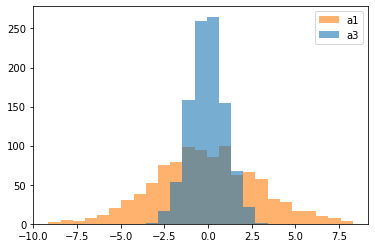

In [ ]:
plt.hist([a1,a3], alpha=.6, histtype='stepfilled', bins=25)
plt.legend(['a1', 'a3'])

### **| 분산**

\begin{align}
var(x) = \frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1} 
\end{align}
\begin{align}
 & \\
 & x_i :? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.var(a, ddof) 
a.var(ddof)
s.var(ddof)
```

* `a1`과 `a3`의 분산을 계산

In [ ]:
print('np.var: ',np.var(a1, ddof=1)) # a1 의 분산
print('a.var: ', a1.var(ddof=1))
print('s.var: ', s1.var(ddof=1))

np.var:  0.9752096659781323
a.var:  0.9752096659781323
s.var:  0.9752096659781343


In [ ]:
print('np.var:', np.var(a3, ddof=1)) # a3 의 분산
print('a.var: ', a3.var(ddof=1))
print('s.var: ', s3.var(ddof=1))

np.var: 8.776886993803192
a.var:  8.776886993803192
s.var:  8.776886993803183


### **| 표준편차**


\begin{align}
std(x)= \sqrt{var(x)} = 
\sqrt{\frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1}} 
\end{align}
\begin{align}
 & \\
 & x_i : ? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.std(a, ddof) 
a.std(ddof)
s.std(ddof)
```

* `a1`과 `a3`의 표준편차 계산

In [ ]:
print('np.std: ', np.std(a1, ddof=1)) # a1 의 표준편차
print('a.std: ', a1.std(ddof=1))
print('s.std: ', s1.std(ddof=1))

np.std:  0.9875270456945128
a.std:  0.9875270456945128
s.std:  0.9875270456945138


In [ ]:
print('np.std: ', np.std(a3, ddof=1)) # a3 의 표준편차
print('a.std: ', a3.std(ddof=1))
print('s.std: ', s3.std(ddof=1))

np.std:  2.9625811370835384
a.std:  2.9625811370835384
s.std:  2.962581137083537


* `a1`의 분산과 `a1`의 표준편차제곱을 비교

In [ ]:
np.var(a1, ddof=1) # a1 의 분산

0.9752096659781323

In [ ]:
np.std(a1, ddof=1)**2 # a1 의 표준편차의 제곱

0.9752096659781323

In [ ]:
# 분산과 표준편차의 제곱은 같은 값을 지닌다.

### **| 변동계수**

분산 혹은 표준편차를 스케일에 영향을 받지 않도록 데이터를 스케일링 한 후 분산 혹은 표준편차를 계산


\begin{align}
변동계수 = \frac{var(x) \ or \ std(x) }{Scale(x)} 
\end{align}


#### **변동계수의 필요성**

* `a1`의 모든 요소에 10을 곱한 배열 `a10`을 생성

In [ ]:
a10 = a1*10

* `a1`과 `a10`의 분산 계산

In [ ]:
np.var(a1, ddof=1) # a1 의 분산

0.9752096659781323

In [ ]:
np.var(a10, ddof=1) # a10 의 분산

97.52096659781323

In [ ]:
# a1의 분산에 10을 곱한것은 a1의 모든 요소에 10을 곱한 값들의 분산과 동일하다.
# 프린트에 나온 분산의 성질을 보여주는 예시다.

#### **스케일링: min-max**

**min-max scaling** : 최대값을 1로, 최소값을 0으로 스케일링 하는  기법.

\begin{align}
minmax(x)=\frac{x-min(x)}{max(x)-min(x)}
\end{align}

\begin{align}
 & \\
 & x : ? \\
 & min(x) : ?\\
 & max(x) : ?\\ 
\end{align}



* min-max 함수 생성

In [ ]:
def mm(x):
  return (x-min(x))/(max(x)-min(x))

* `a1`을 min-max scaling 하여 `a1_minmax` 로 바인딩

In [ ]:
a1_minmax = mm(a1)

* `a10`을 min-max scaling 하여 `a10_minmax` 로 바인딩

In [ ]:
a10_minmax = mm(a10)

* `a1`과 `a1_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

Text(0.5, 1.0, 'a1_minmax')

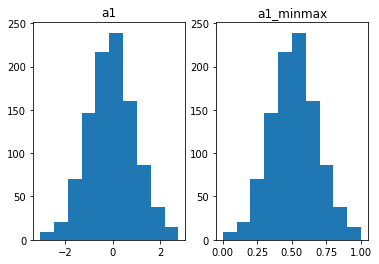

In [ ]:
plt.subplot(121)
_=plt.hist(a1)
plt.title('a1')
  
plt.subplot(122)
_=plt.hist(a1_minmax)
plt.title('a1_minmax')  # X축의 기준값만 바뀌고 Y값은 동일함. minmax 스케일링을 한 오른쪽 그래프의 X값은 0과 1사이에 분포한다.

* `a10`과 `a10_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

Text(0.5, 1.0, 'a10_minmax')

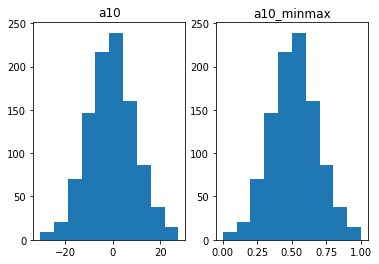

In [ ]:
plt.subplot(121)
_=plt.hist(a10)
plt.title('a10')

plt.subplot(122)
_=plt.hist(a10_minmax)
plt.title('a10_minmax') # a10 과 a10_minmax 도 위와 동일한 성질을 지닌다. x값이 0에서 1사이에 분포한다.

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [ ]:
print(np.ptp(a1))
print(np.ptp(a1_minmax))  # minmax 스케일링은 어떤 값을 해주어도 범위가 1로 고정된다(0이 최소값 1이 최대값으로 고정)

5.805498168821509
1.0


In [ ]:
print(np.ptp(a10))
print(np.ptp(a10_minmax)) # 어떤 값을 곱하든 상관없이 범위가 고정되어 있는것을 알 수 있다.

58.05498168821509
1.0


* 스케일링 후 `a1_minmax`, `a10_minmax`의 분산 구하기

In [ ]:
np.var(a1_minmax, ddof=1)

0.028934701900306115

In [ ]:
np.var(a10_minmax, ddof=1) # 분산은 동일하다.

0.02893470190030611

#### **스케일링: z-score**

**standard(z-socre) scaling** : 평균을 0으로, 표준편차를 1로 스케일링 하는  기법.

\begin{align}
\\
standard(x)=\frac{x-\mu}{\sigma}
\end{align}
\begin{align}
 & \\
 & x : ? \\
 & \mu : ?\\
 & \sigma : ?\\ 
\end{align}


* standard 함수 생성

In [ ]:
def st(x):
  return (x-x.mean())/x.std(ddof=1)

* `a1`을 standard 하여 `a1_standard` 로 바인딩

In [ ]:
a1_standard = st(a1)

* `a10`을 standard 하여 `a10_standard` 로 바인딩

In [ ]:
a10_standard = st(a10)

* `a1`과 `a1_standard`의 분포를 (1x2) 플롯에 그려 비교하기




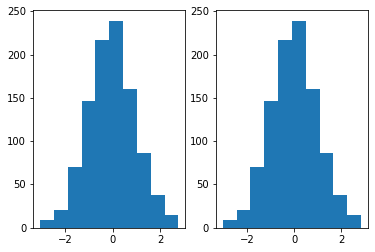

In [ ]:
plt.subplot(121)
_=plt.hist(a1)
  
plt.subplot(122)
_=plt.hist(a1_standard) # a1 과 a1을 제로 스코어 스케일링 한 값은 동일한 값을 지닌다.

* `a10`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

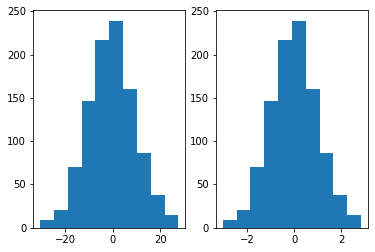

In [ ]:
plt.subplot(121)
_=plt.hist(a10)
  
plt.subplot(122)
_=plt.hist(a10_standard)  # a10을 제로 스코어 스케일링 하면 a1을 제로 스코어 스케일링 한 범위와 동일한 값을 가진다.

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [ ]:
print(np.ptp(a1))
print(np.ptp(a1_standard)) # z-score 로 스케일링했을때 범위는 거의 동일하다.

5.805498168821509
5.87882447790439


In [ ]:
print(np.ptp(a10))
print(np.ptp(a10_standard)) # z-score의 스케일링한 값의 범위가 5.8788로 고정되어있다(모든 a값에 어떤 값을 곱해도 동일하다.)

58.05498168821509
5.8788244779043906


* 스케일링 후 `a1_standard`, `a10_standard`의 분산 구하기

In [ ]:
np.var(a1_standard, ddof=1) # a1_standard 의 분산

1.0

In [ ]:
np.var(a10_standard, ddof=1) # a10_standard 의 분산

1.0000000000000002

### **| 범위와 사분위 범위**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0305-01.png?raw=true?raw=true width=800>
</p>


* `a10` 의 분포 그리기

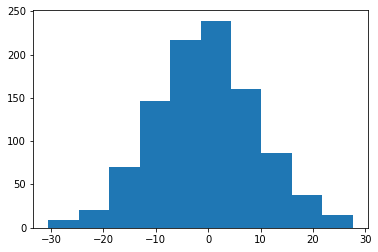

In [ ]:
_=plt.hist(a10)

#### **범위**

\begin{align}
\\
범위 = max(x)-min(x)
\end{align}

```
np.ptp(x)
```

# 새 섹션

* `a10`의 범위 구하기

In [ ]:
# np.ptp 사용
print(np.ptp(a10))
# max-min 사용
print(max(a10)-min(a10))

58.05498168821509
58.05498168821509



#### **사분위 범위**

\begin{align}
\\
사분위 범위 = 3사분위수 - 1사분위수 = 하위 75 \% 수 - 하위 25\% 수
\end{align}

```
np.quantile(x, percent)
```

# 새 섹션

* `a10`의 사분위 범위 구하기

In [ ]:
np.quantile(a10, 0.75)-np.quantile(a10, 0.25) # 3사분위 - 1사분위

13.053706612482689